In [1]:
import pandas as pd
df = pd.read_csv('askeleet.csv',decimal= ',', delimiter=';')
df.head()

,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),Absolute acceleration (m/s^2)
0,0.035928,0.077271,-0.164344,0.206892,0.275290
1,0.038290,0.034372,-0.162244,0.160993,0.231135
2,0.040654,-0.022357,-0.100327,0.103711,0.146018
3,0.043018,-0.063307,-0.085326,0.067711,0.125989
4,0.045382,-0.149407,-0.066426,0.047761,0.170341


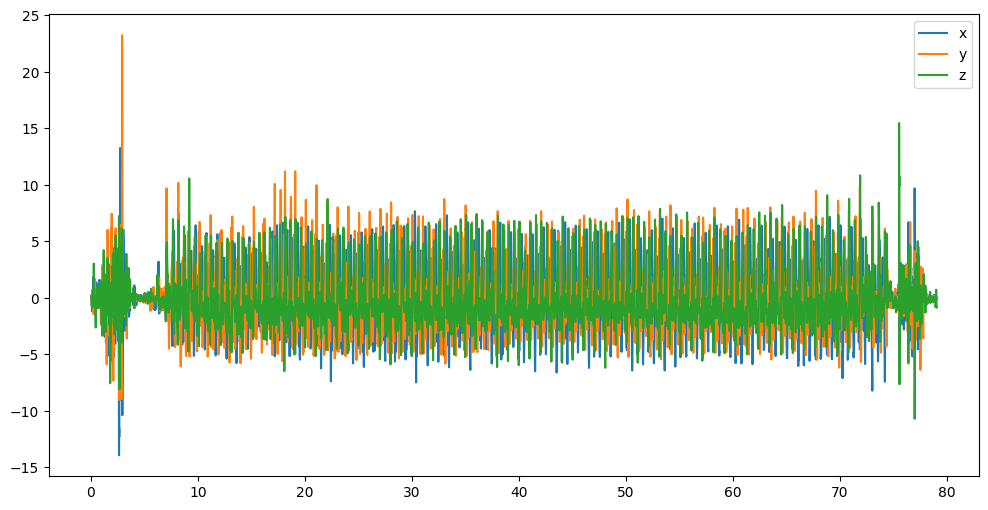

Time (s)                         1.321318e+06
Linear Acceleration x (m/s^2)    7.887617e+04
Linear Acceleration y (m/s^2)    7.607220e+04
Linear Acceleration z (m/s^2)    6.298554e+04
Absolute acceleration (m/s^2)    1.433348e+05
dtype: float64

In [2]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,6))
plt.plot(df['Time (s)'],df['Linear Acceleration x (m/s^2)'])
plt.plot(df['Time (s)'],df['Linear Acceleration y (m/s^2)'])
plt.plot(df['Time (s)'],df['Linear Acceleration z (m/s^2)'])
#plt.plot(df['Time (s)'],df['Absolute acceleration (m/s^2)'])
plt.legend(['x','y','z','abs'])
plt.show()
(df.abs()).sum()

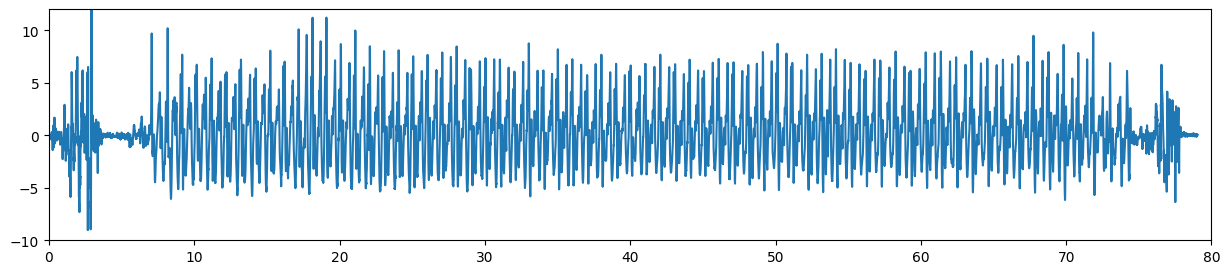

In [3]:
#Valitaan analyysiin z-komponentti.
fig = plt.figure(figsize=(15,3))
plt.plot(df['Time (s)'],df['Linear Acceleration y (m/s^2)'])
plt.axis([0, 80, -10, 12])
plt.show()

In [4]:
#Määritellään filtterit

from scipy.signal import butter,filtfilt
#Asenna scipy pipillä jos on tarvis

def butter_lowpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

def butter_highpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    y = filtfilt(b, a, data)
    return y

In [5]:
#Datan soudatus
noisy_signal = df['Linear Acceleration y (m/s^2)']

# Filtterin parametrit    
T= df['Time (s)'][len(df)-1] - df['Time (s)'][0]              # Koko datan pituus
n = int(len(df['Time (s)'])) # Näytteiden lukumäärä
fs = n/T                # Näytteenottotaajuus (oletetaan vakioksi)

cutoff = 1/(0.9)         # Alipäästösuodattimen taajuus, Hz
#cutoff2 = 1/(5)         # Ylipäästösuodattimen taajuus, Hz

nyq = 0.5 * fs          # Nyquistin taajuus
order = 1               # Kertaluku

lowpass_filtered = butter_lowpass_filter(noisy_signal, cutoff, fs, nyq, order)
#highpass_filtered = butter_highpass_filter(noisy_signal, cutoff2, fs, nyq, order)



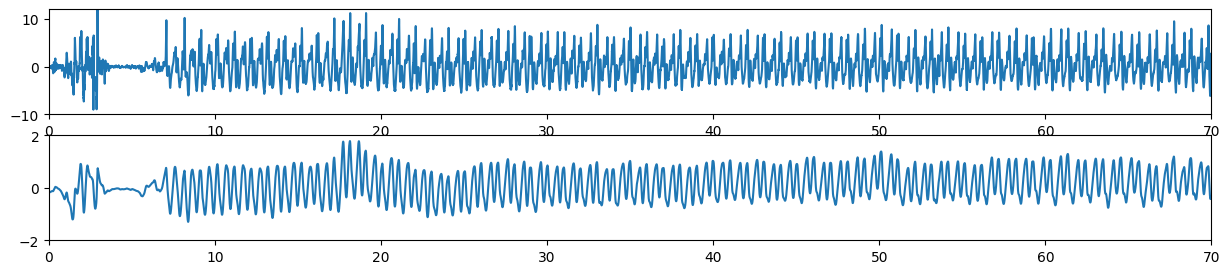

In [6]:
fig = plt.figure(figsize=(15,3))
plt.subplot(2,1,1)
plt.plot(df['Time (s)'],df['Linear Acceleration y (m/s^2)'])
plt.axis([0, 70, -10, 12])
plt.subplot(2,1,2)
plt.plot(df['Time (s)'],lowpass_filtered)
plt.axis([0, 70, -2, 2])
plt.show()

In [7]:
steps = 0
for i in range(lowpass_filtered.shape[0]-1):
    if lowpass_filtered[i]/lowpass_filtered[i+1] < 0:
        steps = steps + 0.5
        
print(steps)

141.5
